<a href="https://colab.research.google.com/github/arielle00/CMPE252-AI/blob/main/CMPE252_SEC01_SP2023_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Home Assigment 1, CMPE 252, Section 01, Fall 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty).

**This assignment is individual**.

The deadline is Septemper 14, 2023, 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

In [67]:
import os
import time

print(os.getcwd())

/content


import the necessary libraries

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [69]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')
    m=[]
    j = 0
    for i in a.readlines():
        # print(j)
        # print(i.split(" "))
        m.append(np.array(i.split(" "), dtype="int32"))
        j=j+1
    out = np.array(m)
    #print(out)
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***:

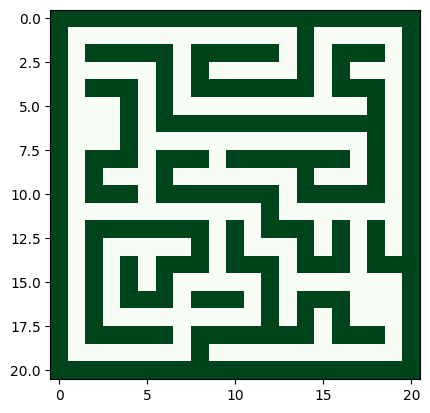

In [70]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')


In [71]:
START=(1, 1)
GOAL=(19,19)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [72]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1 < grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [73]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()

    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [74]:
#example for visualization of maze with visited nodes and shortest path
#visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

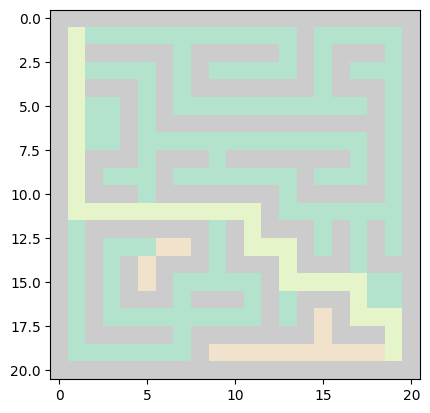

In [75]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search***

In [76]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, w, h_fn):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    visited = set()

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited.add(current)

        for next in (graph[current]):
            #graph[current]=-1
            new_cost = cost_so_far[current] + 1
            if next in visited:
                continue
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost

                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter

                priority = new_cost + w*h_fn(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current=goal
    path = []
    while current != start:
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

***Dijkstra Algorithm***

In [77]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph
    shortest_path = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_path[start_node] = 0

    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START:
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START)
    path.reverse()
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences)
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze.
Use your maze in the below tasks.

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates

In [78]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - GOAL[0])**2 + (node1[1] - GOAL[1])**2)**0.5
    pass



In [79]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return (abs(node1[0]-node2[0]) + abs(node1[1]-node2[1]))
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

In [80]:
def search_maze(START, GOAL, w, h_fn):
  start_time = time.time()
  maze2 = build_maze("my_maze_25x25.txt")
  graph = Find_the_edges(maze2)
  # print(graph)
  # START=(1, 1)
  # GOAL=(24,24)
  #print(graph)
  came_from, path = astar_path(graph, START, GOAL, w, h_fn)
  end_time = time.time()

  print("Distance visited nodes amount:",len(came_from))
  #print("Shortest path nodes:",path)
  print("Shortest path:",len(path))

  for i in came_from:
    maze2[i[0],i[1]]=-3
  for i in path:
    maze2[i[0],i[1]]=-1
  plt.imshow(maze2, cmap='Pastel2')
  plt.show()
  # print(came_from)
  return end_time-start_time, came_from

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

Euclidean
Distance visited nodes amount: 303
Shortest path: 47


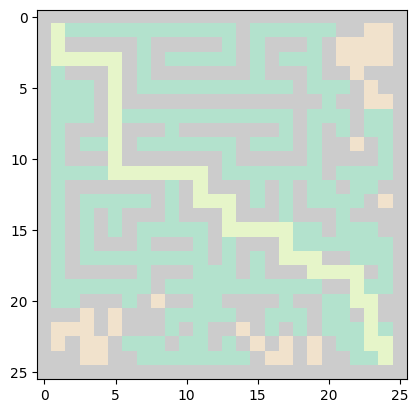

Euclidean total time: 0.015535593032836914


Manhattan
Distance visited nodes amount: 227
Shortest path: 47


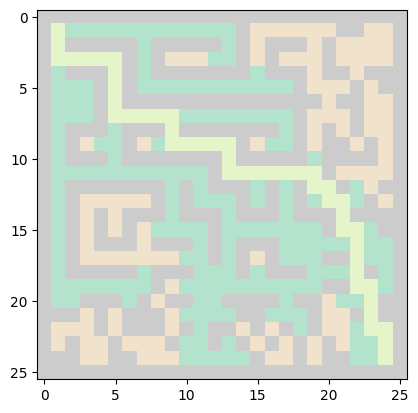

Manhattan total time: 0.007645130157470703


In [81]:

print("Euclidean")
total_time,x = search_maze((1,1), (24,24), 1, Euclidean_distance)
print("Euclidean total time:",total_time)
print("\n")
print("Manhattan")
total_time,x = search_maze((1,1), (24,24), 1, Manhattan_distance)
print("Manhattan total time:",total_time)

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

-----------------Euclidean-----------------
Distance visited nodes amount: 306
Shortest path: 47


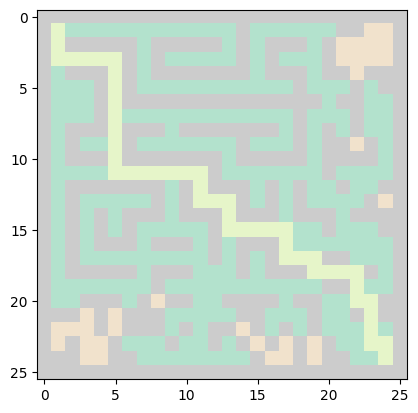

0.011708736419677734
Distance visited nodes amount: 304
Shortest path: 47


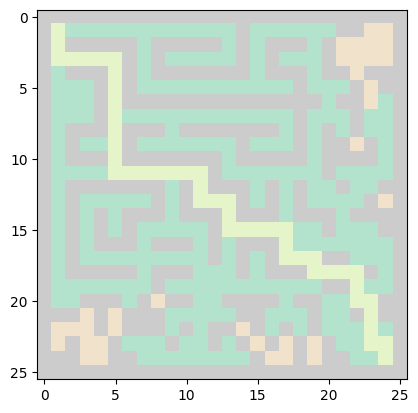

0.017813444137573242
Distance visited nodes amount: 275
Shortest path: 47


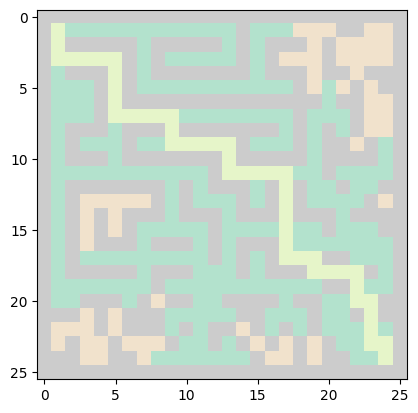

0.009315252304077148
Distance visited nodes amount: 154
Shortest path: 57


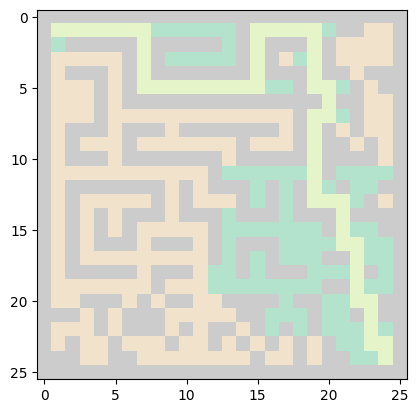

0.010841131210327148
Distance visited nodes amount: 143
Shortest path: 61


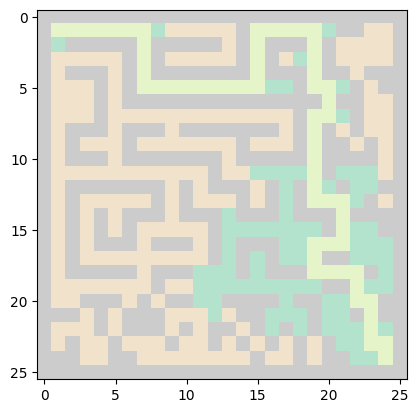

0.008837223052978516


In [82]:
print("-----------------Euclidean-----------------")
weights_euclidean = [0.3,0.8,2,5,10]
times_euclidean = []
came_from = []

for weight in weights_euclidean:
    elapsed_time, search_path = search_maze((1,1), (24,24), weight, Euclidean_distance)
    times_euclidean.append(elapsed_time)
    came_from.append(len(search_path))
    print(elapsed_time)


-----------------Manhattan-----------------
Distance visited nodes amount: 187
Shortest path: 37


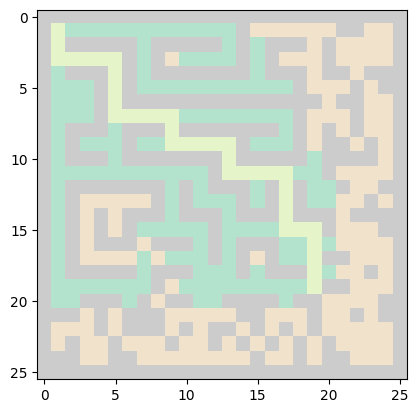

0.009788990020751953
Distance visited nodes amount: 101
Shortest path: 37


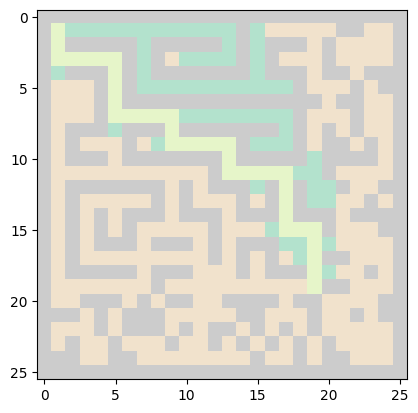

0.010059833526611328
Distance visited nodes amount: 79
Shortest path: 51


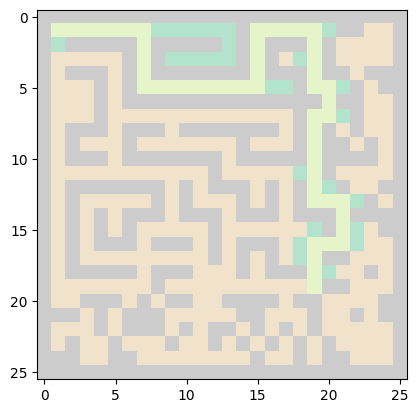

0.006369590759277344
Distance visited nodes amount: 79
Shortest path: 51


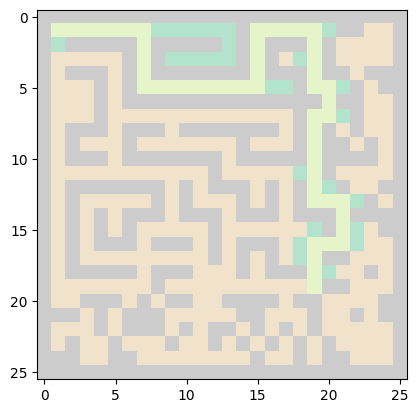

0.011479854583740234


In [83]:
print("-----------------Manhattan-----------------")
weights_manhattan = [0.8,1.6,5,10]
times_manhattan = []
came_from_manh = []


for weight in weights_manhattan:
    elapsed_time, search_path = search_maze(START, GOAL, weight, Manhattan_distance)
    times_manhattan.append(elapsed_time)
    came_from_manh.append(len(search_path))
    print(elapsed_time)


Explain what changes you observe for the different weights and why it occurs.

For the Euclidean distance the shortest path increased when I used higher weights such as 5 and 10. When I tried w = 2 he shortest path was the same as weight=1 but the nodes explored increased. From observation it seems that a weight closer to 1 is the best, least nodes explored and optimal shortest path. Less and 1 also got us the optomal shortest path but explored more nodes.

For the Manhattan distance, when I tried w=0.8, I got the optimal shortest path but it explored more nodes than w=1. But, anything above 1.5 gave me the non optimal shortest path but did explore much less nodes. The best result is given when the weight is closer to 1.

Having higher weights causes the shortest path not to be the optimal shortest path because the algorith tries to minimize the heuristic function too much. You need to have a good balance between heuristic function and the actual cost to get to the goal from your state.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

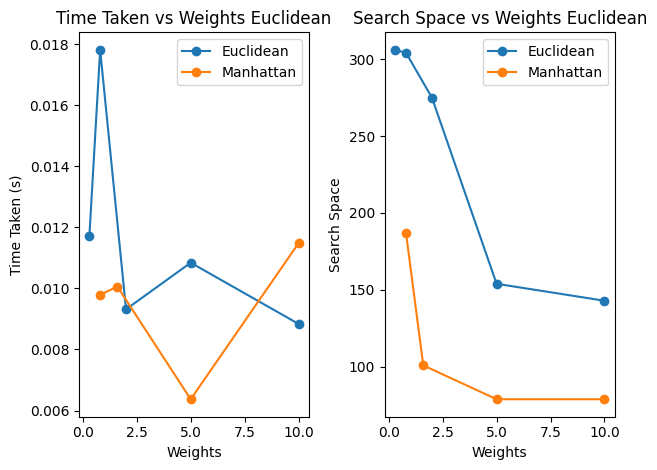

In [84]:
plt.subplot(121)
plt.plot(weights_euclidean, times_euclidean, marker='o', label='Euclidean')
plt.plot(weights_manhattan, times_manhattan, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Euclidean')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(weights_euclidean, came_from, marker='o', label='Euclidean')
plt.plot(weights_manhattan, came_from_manh, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Euclidean')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for Dijkstra: 47


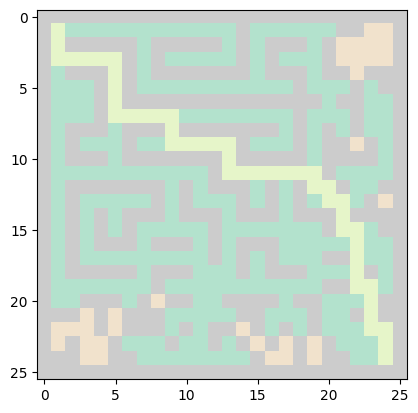

In [85]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for BFS: 47


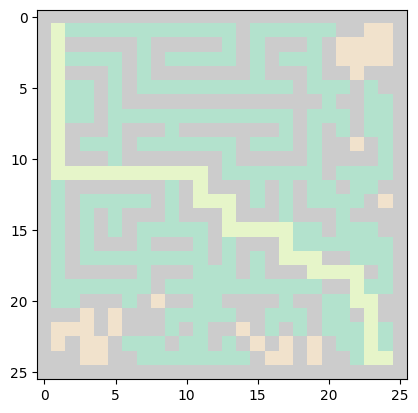

In [86]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

Euclidean
Distance visited nodes amount: 138
Shortest path: 31


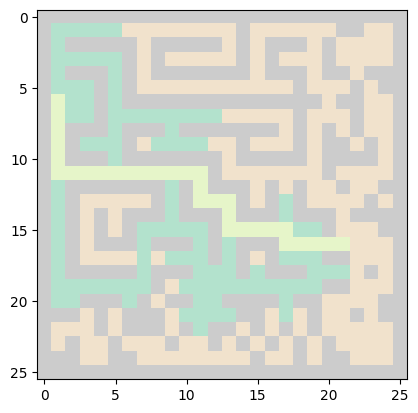

Manhattan
Distance visited nodes amount: 62
Shortest path: 31


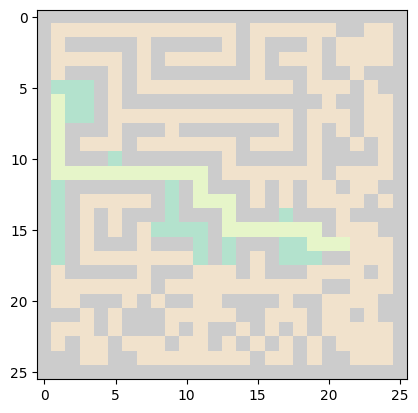

Shortest path for Dijkstra: 31


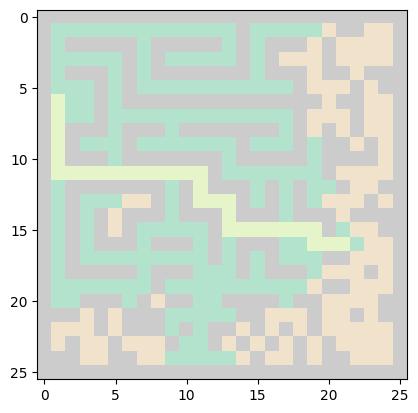

Shortest path for BFS: 31


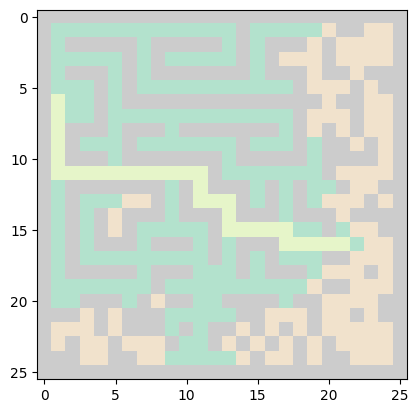

In [87]:
#### FIRST RANDOM START&GOAL
print("Euclidean")
total_time,x = search_maze((6,1), (16,21), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((6,1), (16,21), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(6,1)
GOAL=(16,21)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

When we start at (6,1) and set our goal to (16,21), a different shortest path is found. In the grid we can see the shortest path obtained by Manhattan, Euclidean hueristics and Dijkstra and BFS. They all got the optimal solution which had the shortest path of 31. Some algorithms explored more nodes than others making some quicker. Manhattan seems to have most unexplored nodes which means it would be the best algo to pick for this specific example.

Euclidean
Distance visited nodes amount: 303
Shortest path: 50


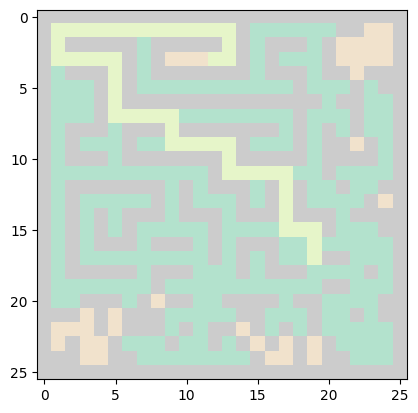

Manhattan
Distance visited nodes amount: 296
Shortest path: 50


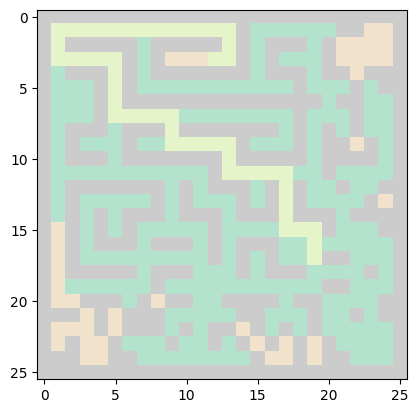

Shortest path for Dijkstra: 50


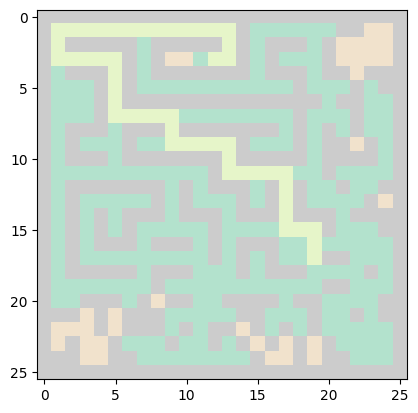

Shortest path for BFS: 50


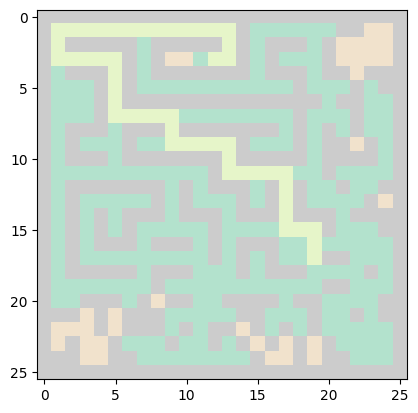

In [88]:
#### SECOND RANDOM START&GOAL
print("Euclidean")
total_time,x = search_maze((17,19), (3,12), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((17,19), (3,12), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(17,19)
GOAL=(3,12)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


When we start at (17,19) and set our goal to (3,12), a different shortest path is found than the original. In the grid we can see the shortest path obtained by Manhattan, Euclidean hueristics and Dijkstra and BFS. They all got the optimal solution which had the shortest path of 50. It seems as though all four algorithms explored pretty much the same amount of nodes so all of them were efficient in this case.

Euclidean
Distance visited nodes amount: 88
Shortest path: 20


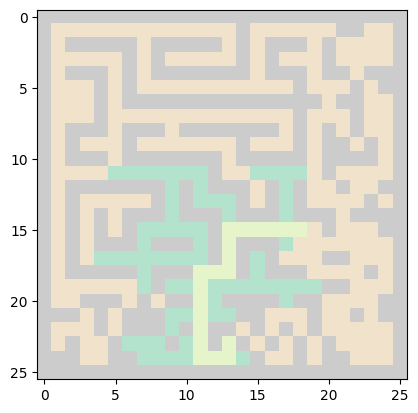

Manhattan
Distance visited nodes amount: 37
Shortest path: 20


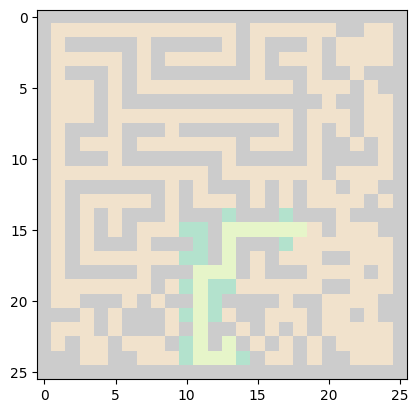

Shortest path for Dijkstra: 20


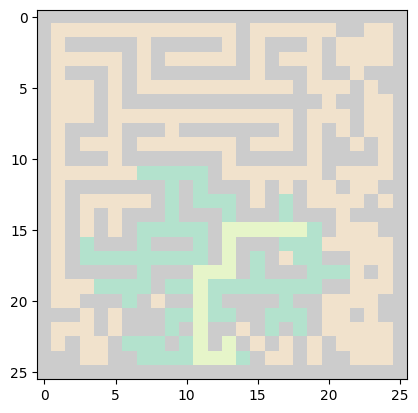

Shortest path for BFS: 20


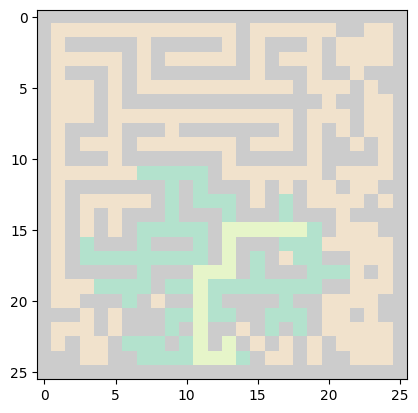

In [89]:
#### THIRD RANDOM START&GOAL

print("Euclidean")
total_time,x = search_maze((23,13), (15,18), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((23,13), (15,18), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(23,13)
GOAL=(15,18)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

When we start at (23,13) and set our goal to (15,18), a different shortest path is found than the original. In the grid we can see the shortest path obtained by Manhattan, Euclidean hueristics and Dijkstra and BFS. They all got the optimal solution which had the shortest path of 20. Some algorithms explored more nodes than others making some quicker. Manhattan seems to have most unexplored nodes which means it would be the best algo to pick for this specific example.

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

In [90]:
def search_maze_diag(START, GOAL, w, h_fn):
  start_time = time.time()
  maze2 = build_maze("my_maze_25x25.txt")
  graph = Find_the_edges_with_diagonal(maze2)

  came_from, path = astar_path(graph, START, GOAL, w, h_fn)
  end_time = time.time()

  print("Distance visited nodes amount:",len(came_from))
  #print("Shortest path nodes:",path)
  print("Shortest path:",len(path))

  for i in came_from:
    maze2[i[0],i[1]]=-3
  for i in path:
    maze2[i[0],i[1]]=-1
  plt.imshow(maze2, cmap='Pastel2')
  plt.show()
  # print(came_from)
  return end_time-start_time, came_from

In [91]:
def Find_the_edges_with_diagonal(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))

                if i-1>=0 and j-1>=0:
                    eles.append((i-1,j-1))
                if i-1>=0 and j+1<grid_size:
                    eles.append((i-1,j+1))
                if i+1<grid_size and j-1>=0:
                    eles.append((i-1,j+1))
                if i+1<grid_size and j+1<grid_size:
                    eles.append((i+1,j+1))


                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

Euclidean
Distance visited nodes amount: 63
Shortest path: 33


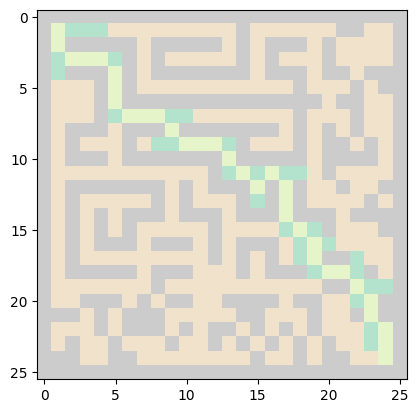

Euclidean total time: 0.018770933151245117


Manhattan
Distance visited nodes amount: 95
Shortest path: 34


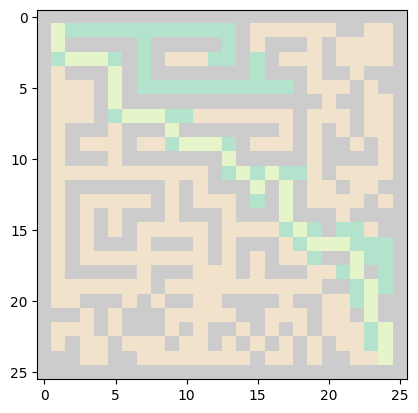

Manhattan total time: 0.014230728149414062


In [92]:
START = (1,1)
GOAL = (24,24)
print("Euclidean")
total_time,x = search_maze_diag(START, GOAL, 1, Euclidean_distance)
print("Euclidean total time:",total_time)
print("\n")
print("Manhattan")
total_time,x = search_maze_diag(START, GOAL, 1, Manhattan_distance)
print("Manhattan total time:",total_time)

When you add diagonal as an option to move around the maze, you can get a shorter path than the original with only 4 options. We can see here that the shortest path is 33 using the Euclidean algorithm which is better than the 47 we were getting in Task2 of the original start/goal states. Also in this specific example, it seems that Euclidean is better than Manhattan as it finds a shorter path with exploring less nodes.

-----------------Euclidean-----------------
Distance visited nodes amount: 313
Shortest path: 32


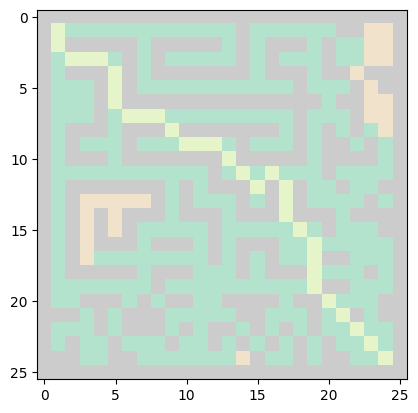

0.015172004699707031
Distance visited nodes amount: 165
Shortest path: 32


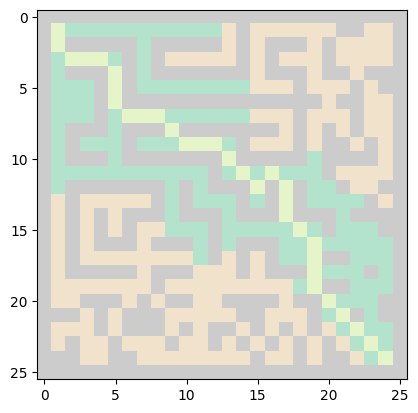

0.013071060180664062
Distance visited nodes amount: 92
Shortest path: 33


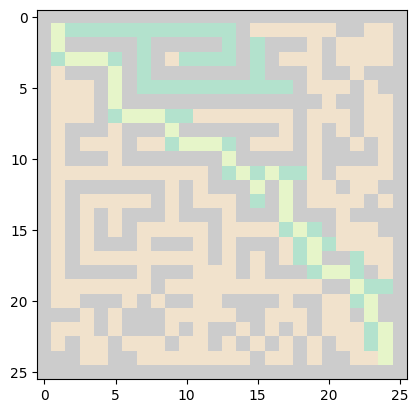

0.013903617858886719
Distance visited nodes amount: 83
Shortest path: 51


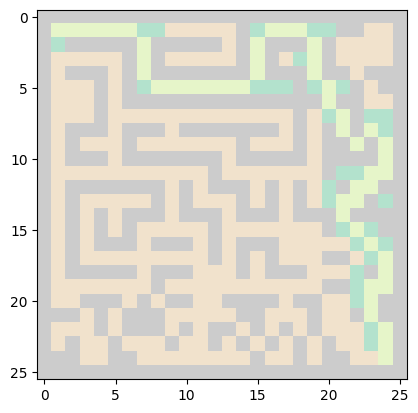

0.013042688369750977
Distance visited nodes amount: 83
Shortest path: 51


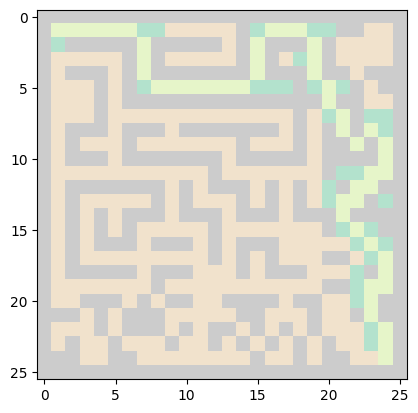

0.01429295539855957
-----------------Manhattan-----------------
Distance visited nodes amount: 62
Shortest path: 33


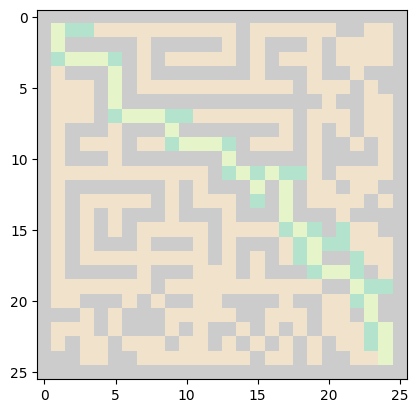

0.015903711318969727
Distance visited nodes amount: 86
Shortest path: 51


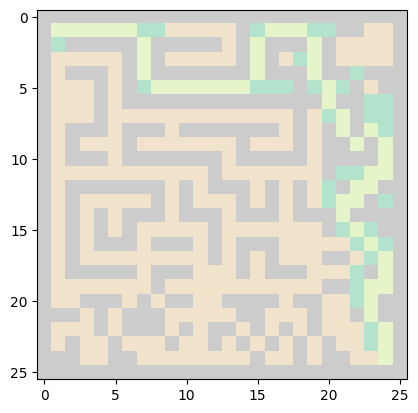

0.016984224319458008
Distance visited nodes amount: 84
Shortest path: 51


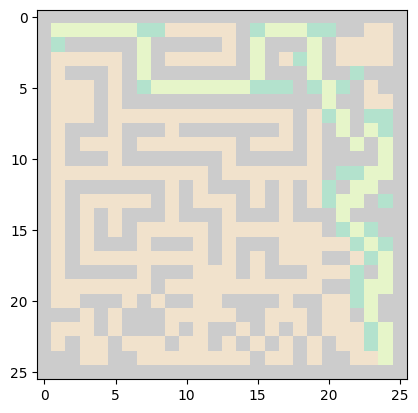

0.016166210174560547
Distance visited nodes amount: 84
Shortest path: 51


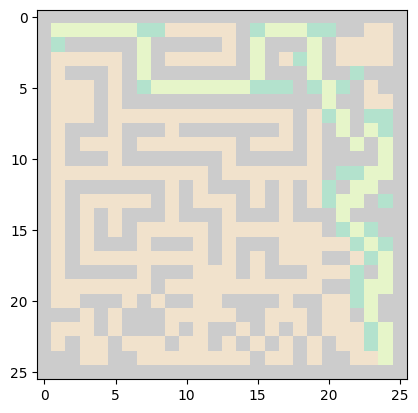

0.017257213592529297


In [93]:
print("-----------------Euclidean-----------------")
weights_euclidean = [0.3,0.8,2,5,10]
times_euclidean = []
came_from = []

for weight in weights_euclidean:
    elapsed_time, search_path = search_maze_diag(START, GOAL, weight, Euclidean_distance)
    times_euclidean.append(elapsed_time)
    came_from.append(len(search_path))
    print(elapsed_time)


print("-----------------Manhattan-----------------")
weights_manhattan = [0.8,1.6,5,10]
times_manhattan = []
came_from_manh = []

for weight in weights_manhattan:
    elapsed_time, search_path = search_maze_diag(START, GOAL,weight, Manhattan_distance)
    times_manhattan.append(elapsed_time)
    came_from_manh.append(len(search_path))
    print(elapsed_time)


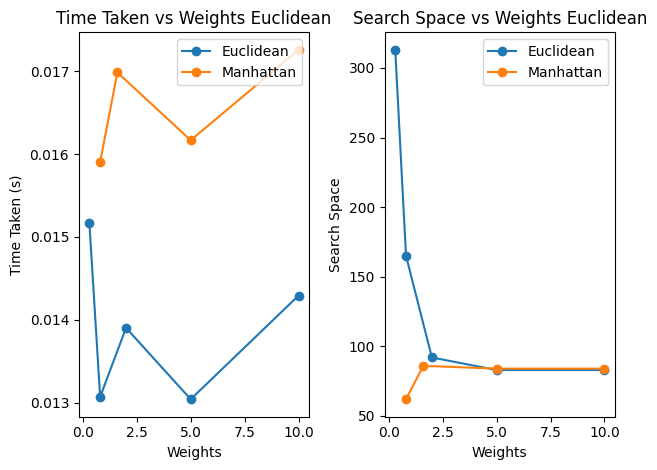

In [94]:
plt.subplot(121)
plt.plot(weights_euclidean, times_euclidean, marker='o', label='Euclidean')
plt.plot(weights_manhattan, times_manhattan, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Euclidean')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(weights_euclidean, came_from, marker='o', label='Euclidean')
plt.plot(weights_manhattan, came_from_manh, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Euclidean')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

When you apply different weights, you can see the search space starts off very different but as you increase weight, both Euclidean and Manhattan will visit a similar amount of nodes. The times are not very accurate because everytime you run the code it changes and swaps between the 2 hueristic fns.

Shortest path for Dijkstra: 32


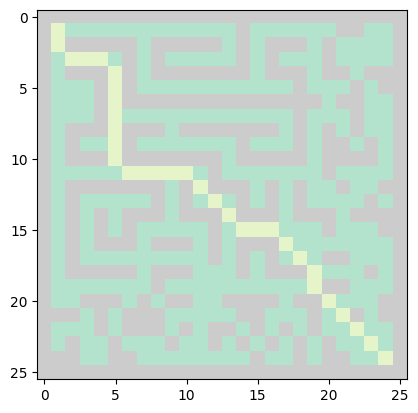

In [95]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges_with_diagonal(my_maze)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

Shortest path for BFS: 32


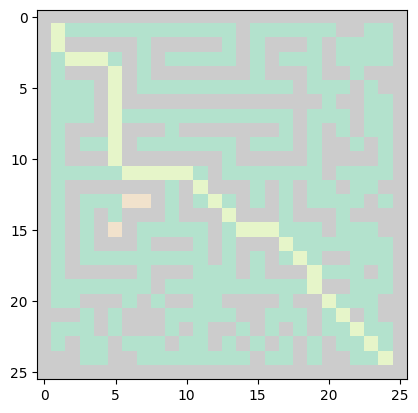

In [96]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges_with_diagonal(my_maze)

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

Dijkstras visits every single node and BFS searches almost all nodes so the Manhattan and Euclidean were way more optimal in this case.

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below.
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
![cmpe252_HW1_Bonus.png](attachment:cmpe252_HW1_Bonus.png)

In [97]:
def astar_path_bonus(start, goal, w, h_fn):
    frontier = PriorityQueue()
    frontier.put(start,8)
    came_from= {}
    cost_so_far= {}

    came_from[start] = None
    cost_so_far[start] = 0
    visited = set()

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break

        visited.add(current)

        for next in Find_the_edges_bonus(current):
            new_cost = cost_so_far[current] + 1
            if next in visited:
                continue
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + w*h_fn(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    current=goal
    path = []

    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

In [98]:
from copy import deepcopy
def Find_the_edges_bonus(state):
    grid_size = len(state)
    reachable_states = []
    diff_moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for i in range(grid_size):
        for j in range(grid_size):
           #if you found the space go through all possible moves and save in reachable states list
            if state[i][j] == 0:
                #go through all 4 moves
                for x_moves, y_moves in diff_moves:
                    new_x = i + x_moves
                    new_y = j + y_moves

                    #if that move is possible then switch the space with the number and append to list
                    if 0 <= new_x < grid_size and 0 <= new_y < grid_size:
                        #convert to lists of list instead of tuples
                        new_state = [list(row) for row in state]
                        new_state[i][j] = new_state[new_x][new_y]
                        new_state[new_x][new_y] = 0
                        #convert back to tuple of tuples
                        reachable_states.append(tuple(map(tuple, new_state)))

    return reachable_states

In [99]:
#Made the states into tuple of tuples because they are hashable and lists are not
START = tuple(map(tuple, [
   [7, 2, 4],
   [5, 0, 6],
   [8, 3, 1]
]))

GOAL = tuple(map(tuple, [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]))

def num_of_displaced_tiles(start,goal):
  incorrect = 0
  for i in range(3):
    for j in range(3):
      if(start[i][j] != goal[i][j]) and start[i][j]!=0:
        incorrect +=1
  return incorrect


path = astar_path_bonus(START, GOAL, 1, num_of_displaced_tiles)
print("Path including start and goal state:", path)
print("Length of path:",len(path))
##### answer is 27 or 26 not including starting path

Path including start and goal state: [((7, 2, 4), (5, 0, 6), (8, 3, 1)), ((7, 2, 4), (0, 5, 6), (8, 3, 1)), ((0, 2, 4), (7, 5, 6), (8, 3, 1)), ((2, 0, 4), (7, 5, 6), (8, 3, 1)), ((2, 5, 4), (7, 0, 6), (8, 3, 1)), ((2, 5, 4), (7, 6, 0), (8, 3, 1)), ((2, 5, 4), (7, 6, 1), (8, 3, 0)), ((2, 5, 4), (7, 6, 1), (8, 0, 3)), ((2, 5, 4), (7, 6, 1), (0, 8, 3)), ((2, 5, 4), (0, 6, 1), (7, 8, 3)), ((2, 5, 4), (6, 0, 1), (7, 8, 3)), ((2, 5, 4), (6, 1, 0), (7, 8, 3)), ((2, 5, 4), (6, 1, 3), (7, 8, 0)), ((2, 5, 4), (6, 1, 3), (7, 0, 8)), ((2, 5, 4), (6, 1, 3), (0, 7, 8)), ((2, 5, 4), (0, 1, 3), (6, 7, 8)), ((2, 5, 4), (1, 0, 3), (6, 7, 8)), ((2, 5, 4), (1, 3, 0), (6, 7, 8)), ((2, 5, 0), (1, 3, 4), (6, 7, 8)), ((2, 0, 5), (1, 3, 4), (6, 7, 8)), ((0, 2, 5), (1, 3, 4), (6, 7, 8)), ((1, 2, 5), (0, 3, 4), (6, 7, 8)), ((1, 2, 5), (3, 0, 4), (6, 7, 8)), ((1, 2, 5), (3, 4, 0), (6, 7, 8)), ((1, 2, 0), (3, 4, 5), (6, 7, 8)), ((1, 0, 2), (3, 4, 5), (6, 7, 8)), ((0, 1, 2), (3, 4, 5), (6, 7, 8))]
Length of path: 2